In [1]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import numpy as np
import pandas as pd
plt.ion()

In [2]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

In [3]:
def train_model(model, criterion, optimizer, scheduler, num_epochs):
    since = time.time()
    val_loss = []
    val_acc = []
    train_loss = []
    train_acc = []
    
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            if phase == 'val':
                
                val_loss.append(epoch_loss)
                val_acc.append(epoch_acc)
                
            else:
                train_loss.append(epoch_loss)
                train_acc.append(epoch_acc)
                
            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))
    

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, val_loss, val_acc, train_loss, train_acc

In [4]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure(figsize=(5,5))

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return model.train(mode=was_training)

Epoch 0/19
----------
train Loss: 0.6998 Acc: 0.7636
val Loss: 0.4287 Acc: 0.8255

Epoch 1/19
----------
train Loss: 0.4253 Acc: 0.8330
val Loss: 0.3192 Acc: 0.8822

Epoch 2/19
----------
train Loss: 0.3554 Acc: 0.8609
val Loss: 0.3968 Acc: 0.7923

Epoch 3/19
----------
train Loss: 0.3274 Acc: 0.8723
val Loss: 0.2803 Acc: 0.8918

Epoch 4/19
----------
train Loss: 0.3205 Acc: 0.8702
val Loss: 0.3276 Acc: 0.8717

Epoch 5/19
----------
train Loss: 0.2952 Acc: 0.8818
val Loss: 0.3046 Acc: 0.8874

Epoch 6/19
----------
train Loss: 0.2676 Acc: 0.8927
val Loss: 0.3147 Acc: 0.8255

Epoch 7/19
----------
train Loss: 0.1951 Acc: 0.9205
val Loss: 0.2018 Acc: 0.9145

Epoch 8/19
----------
train Loss: 0.1682 Acc: 0.9345
val Loss: 0.1880 Acc: 0.9232

Epoch 9/19
----------
train Loss: 0.1575 Acc: 0.9353
val Loss: 0.1979 Acc: 0.9215

Epoch 10/19
----------
train Loss: 0.1572 Acc: 0.9340
val Loss: 0.1899 Acc: 0.9232

Epoch 11/19
----------
train Loss: 0.1498 Acc: 0.9405
val Loss: 0.1753 Acc: 0.9250

Ep

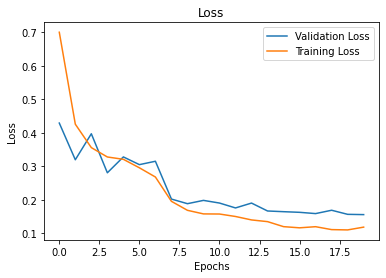

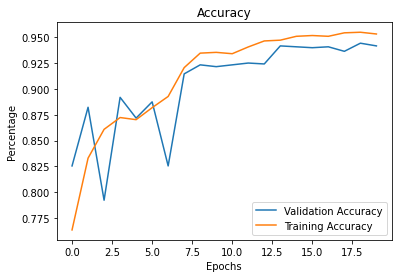

In [5]:
# Data augmentation and normalization for training
# Just normalization for validation

if __name__ == "__main__":
    
    data_transforms = {
        'train': transforms.Compose([
            transforms.RandomResizedCrop(224),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
        'val': transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
    }
    
    # DATA DIRECTORY
    data_dir = 'C:\\Users\\Kris\\..vs code files\\senior design\\images\\data_cnc_revised'
    image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                              data_transforms[x])
                      for x in ['train', 'val']}
    dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                                 shuffle=True, num_workers=4)
                  for x in ['train', 'val']}
    dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}

    inputs, classes = next(iter(dataloaders['train']))
    class_names = image_datasets['train'].classes

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Make a grid from batch
    out = torchvision.utils.make_grid(inputs)
    
#    imshow(out, title=[class_names[x] for x in classes])
#    
    
    model_ft = models.vgg16(pretrained=True)
    # model_ft = models.resnet152(pretrained=True)
    # num_ftrs = model_ft.fc.in_features
    # Here the size of each output sample is set to 2.
    # Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
    #model_ft.fc = nn.Linear(num_ftrs, 2)
    
    model_ft = model_ft.to(device)
    
    criterion = nn.CrossEntropyLoss()
    
    # Observe that all parameters are being optimized
    optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
    
    # Decay LR by a factor of 0.1 every 7 epochs
    exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
    num_epochs = 20
    model_ft, vl, va, tl, ta = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs= 20)
    
    va = [x.item() for x in va]
    ta = [x.item() for x in ta]
    x = np.arange(num_epochs)
    plt.figure()
    plt.plot(x, vl, tl)
    plt.legend(['Validation Loss', 'Training Loss'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss')
    plt.savefig('C:\\Users\\Kris\\..vs code files\\senior design\\ML-Breat_Cancer_Classfier-master\\results\\graphs\\2-23_vgg_loss.png')
    
    plt.figure()
    plt.plot(x, va, ta)
    plt.legend(['Validation Accuracy', 'Training Accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Percentage')
    plt.title('Accuracy')
    plt.savefig('C:\\Users\\Kris\\..vs code files\\senior design\\ML-Breat_Cancer_Classfier-master\\results\\graphs\\2-23_vgg_accuracy.png')
    
    
 #%%   
   
    out_data = pd.DataFrame([vl, va, tl, ta])
    out_data = out_data.T
    out_data.columns = ['val_loss', 'val_acc', 'train_loss', 'train_acc']
    out_data.to_csv("C:\\Users\\Kris\\..vs code files\\senior design\\ML-Breat_Cancer_Classfier-master\\results\\graphs\\2-23_vgg_training_data.txt", sep = '\t', index = False)
    
    #%%
    
    torch.save(model_ft,"C:\\Users\\Kris\\..vs code files\\senior design\\ML-Breat_Cancer_Classfier-master\\model\\2-23_vgg_model.pt")
    
    torch.save(model_ft.state_dict(),"C:\\Users\\Kris\\..vs code files\\senior design\\ML-Breat_Cancer_Classfier-master\\model\\2-23_vgg_model_state_dict.pt")